**EXTRAÇÃO**

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


**Cálculo de Proporções**

In [98]:
# Contagem das classes
contagem = df['Churn'].value_counts()

ativos = contagem.get(0, 0)
evadidos = contagem.get(1, 0)

proporcao = evadidos / ativos if ativos != 0 else None

print(f"Clientes ativos: {ativos}")
print(f"Clientes evadidos: {evadidos}")
print(f"Proporção (evadidos / ativos): {proporcao:.4f}")


Clientes ativos: 5174
Clientes evadidos: 1869
Proporção (evadidos / ativos): 0.3612


/tmp/ipython-input-2836430914.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ativos = contagem.get(0, 0)
/tmp/ipython-input-2836430914.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  evadidos = contagem.get(1, 0)


In [100]:
# Avaliação simples do desequilíbrio
if proporcao is not None:
    if proporcao < 0.2:
        print("⚠️ Atenção: Classes desbalanceadas — poucos evadidos comparado com ativos.")
    else:
        print("✔️ Classes relativamente balanceadas.")

✔️ Classes relativamente balanceadas.


In [67]:
#Ver as colunas disponíveis
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

**Verificando dados nulos**

In [68]:
#Verficaar a estrutura geral
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

**Preparação dos Dados**

In [69]:
df = df.drop(columns=['customerID'])

In [70]:
#Para criar um novo
df_clean = df.copy()

#Etapa 1> agrupar "No internet service" como "No"
cols_to_fix = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
    ]

for col in cols_to_fix:
        df_clean[col] = df_clean[col].replace('No internet service', 'No')

        #One-hot wcoding (sem dummy trap)
        categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [71]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

**Verificaçao novamente dos valores nulos**

In [72]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [73]:
#Verifica valores nulos nas duas colunas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [74]:
#remove linhas com valores nulos nas colunas específicadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [75]:
#Tratamento de valores nulos

df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


**Normalização/Padronização**

In [76]:
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

#Iniciando scaler
scaler = MinMaxScaler()

#Aplicando a normalização
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

#Exibindo os dados normalizados
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,0.125000,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.484680,0.471144,0.066294
1,0003-MKNFE,No,Male,0.0,No,No,0.125000,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.431755,0.414428,0.060420
2,0004-TLHLJ,Yes,Male,0.0,No,No,0.055556,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.523677,0.553731,0.030239
3,0011-IGKFF,Yes,Male,1.0,Yes,No,0.180556,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.754875,0.793532,0.140670
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,0.041667,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.699164,0.653234,0.028687


**Correlação entre variaveis**

In [77]:
corr = df_encoded.corr()

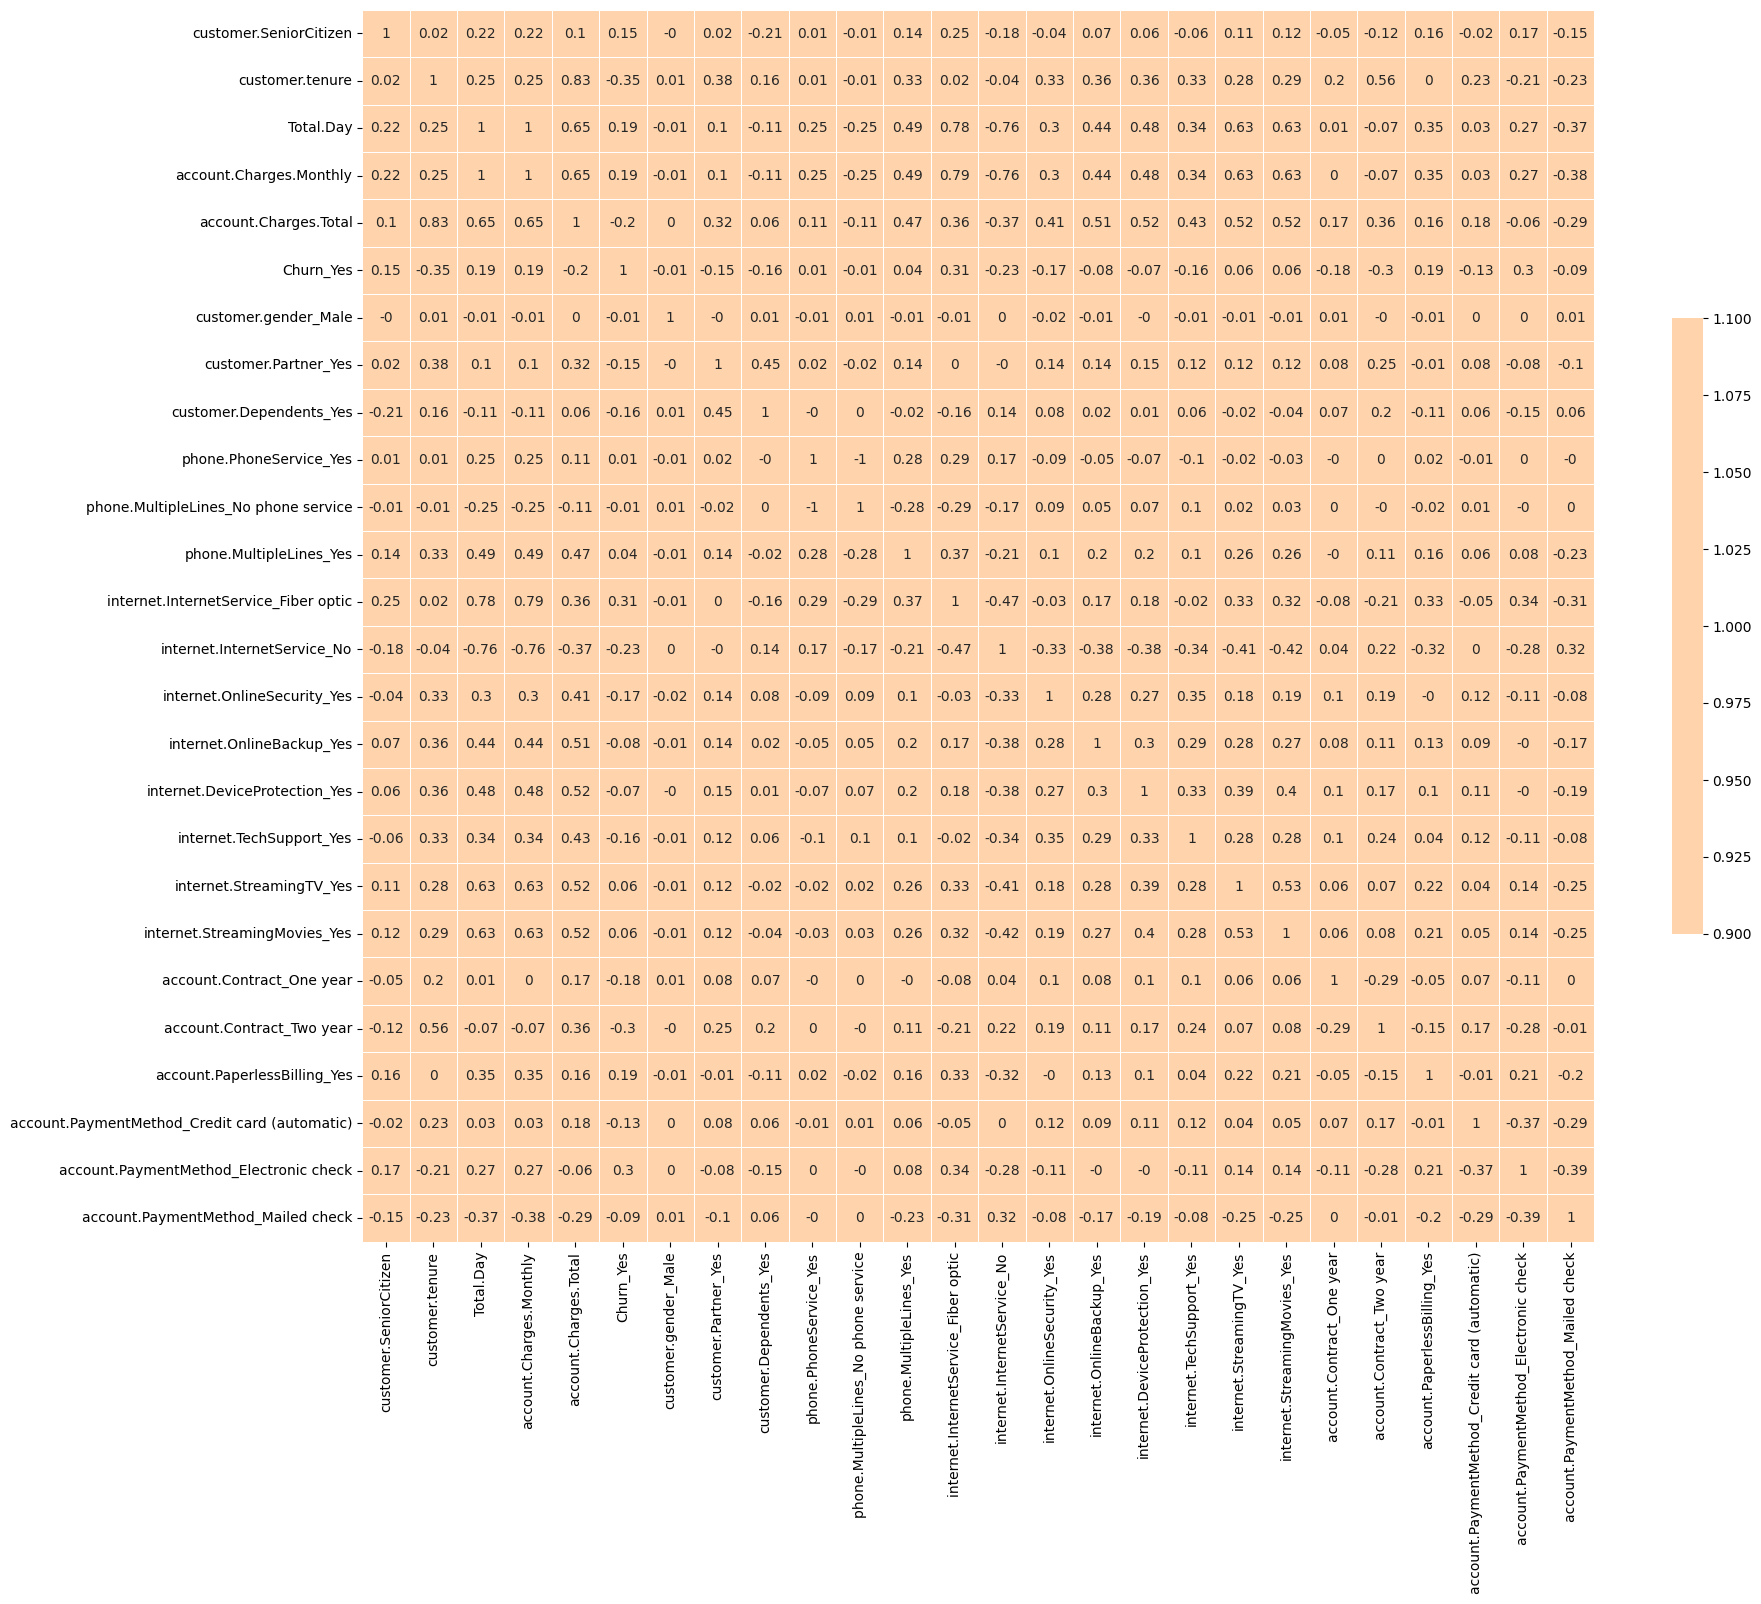

In [78]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=1, center=0,
                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

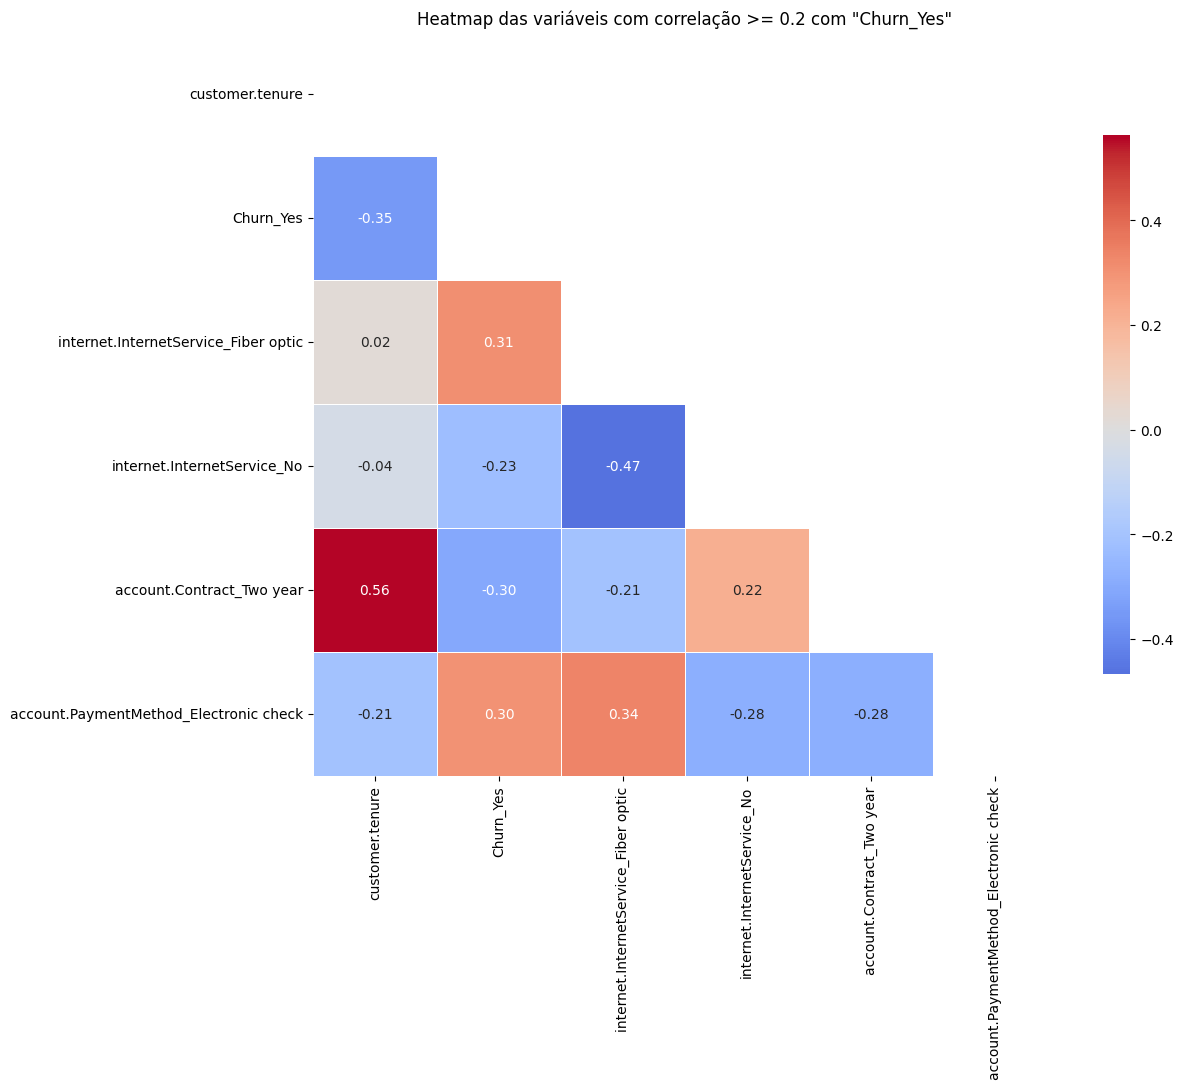

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

#Definir variavel alvo
target_var = 'Churn_Yes'

#Definir o limiar minimo de correlação absoluta para a seleção
limiar = 0.2


# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada =  corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

**Bibliotecas necessárias**

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Selecionar as variáveis independentes

In [81]:
#Nao incluir variável-alvo (ex: Churn_Yes) no cálculo do VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

**Adicionar constante (intercepto)**

In [82]:
X_const = add_constant(X)

**Calcular o VIF**

In [83]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


**FIV REFEITA**

In [84]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [85]:
# Exemplo: manter apenas Charges.Monthly
X_filtered.drop(columns=["account.Charges.Total"], inplace=True)

**FIV 2**

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# === Remover a variável account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"], errors='ignore')


# === Recalcular o VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Exibir os resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


**Análise Direcionada : Investigando como variáveis específicas se relacionam com a evasão**

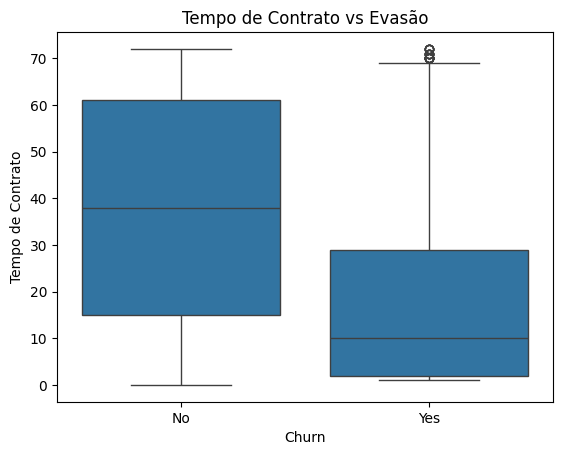

In [107]:
# Boxplot - Tempo de contrato vs Churn
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Churn')
plt.ylabel('Tempo de Contrato')
plt.show()

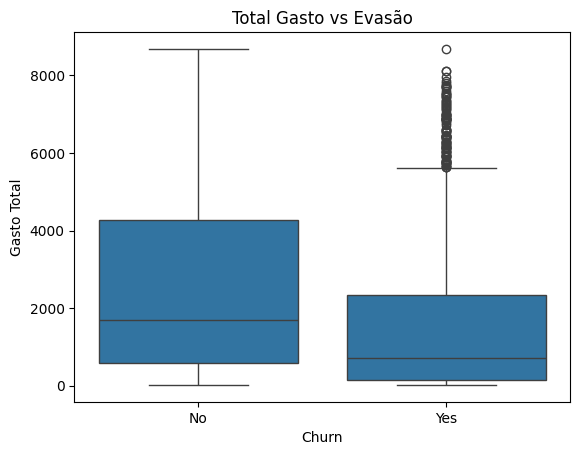

In [108]:
# Total gasto vs Churn
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Total Gasto vs Evasão')
plt.xlabel('Churn')
plt.ylabel('Gasto Total')
plt.show()

**Modelo Preditivo**

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

separar features e target

In [89]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Divisão de treino e teste

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

**Normalizar**

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balanceamento treino com Smote**




In [92]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regressão Lógica**

In [93]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



**Random Forest**

In [94]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



# Relátorio Final

## ✅ Conclusão

Com base na análise das variáveis selecionadas e no desempenho dos modelos treinados (Random Forest e Regressão Logística), foi possível identificar **os principais fatores que influenciam a evasão de clientes**:

### 🔍 Fatores com maior influência na evasão:

* **Contrato de curto prazo**: clientes com contrato mensal apresentaram maior propensão a evadir, enquanto contratos anuais ou de dois anos foram associados à permanência.
* **Tipo de serviço de internet**: usuários com **internet via fibra óptica** mostraram maior taxa de evasão.
* **Falta de serviços adicionais**: clientes que **não utilizam serviços de segurança online, suporte técnico, backup e proteção de dispositivo** tendem a evadir com mais frequência.
* **Método de pagamento**: clientes que utilizam **débito automático ou boleto (check mailed)** apresentaram menor propensão à evasão do que aqueles que pagam via **cheque eletrônico**.
* **Cobrança mensal elevada**: valores mais altos na fatura mensal estiveram associados a maiores taxas de evasão.
* **Faturamento total menor**: clientes com **baixo valor total gasto** até o momento tendem a evadir, indicando menor tempo de permanência ou engajamento.

### 🤖 Análise dos Modelos

* A **Regressão Logística** teve o melhor desempenho na identificação da evasão (Recall: **81%** para clientes que evadiram), sendo mais eficaz na **detecção de clientes em risco**.
* O **Random Forest** apresentou **maior acurácia geral** (77,9%) e **bom equilíbrio entre classes**, mas com desempenho inferior na detecção da evasão (Recall: **60%**).

---

## 📌 Estratégias de Retenção Recomendadas

Com base nos insights obtidos, sugerem-se as seguintes ações:

1. **Oferecer planos com fidelidade ou benefícios para contratos mais longos**, incentivando a permanência.
2. **Personalizar ofertas de serviços adicionais (como suporte técnico, segurança online, etc.)**, destacando os benefícios para o cliente.
3. **Revisar estratégias de precificação**, especialmente para clientes com alto valor mensal, oferecendo bônus, descontos por fidelidade ou pacotes mais vantajosos.
4. **Focar em clientes novos com baixo total gasto**, oferecendo onboarding mais estruturado, comunicação frequente e acompanhamento nos primeiros meses.
5. **Incentivar métodos de pagamento com menor propensão à evasão**, como débito automático ou cartão de crédito com recorrência.

---
